## Makes some plots for presentation

In [66]:
import importData
from importData import AudioDataImporter
from pathlib import Path
import processing_methods
filepath = Path("C:/Users/carbo/Documents/MIMII/RawData/+6dB/pump/id_02/normal")
dic = {'channel' : 1}
dic['max_freq'] = 3500

importer = AudioDataImporter(filepath, dic, "normal")
dic, raw_data = importer._set_raw_data()

Visualize healthy data !

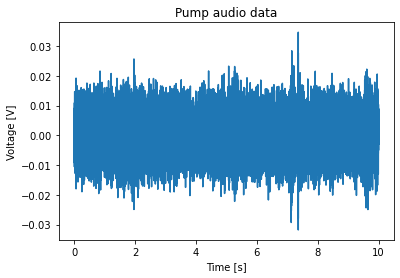

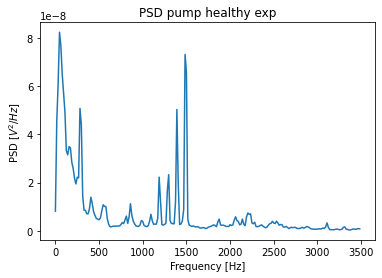

In [69]:
import matplotlib.pyplot as plt

def fun_plot(data, x_vector, xlabel : str, ylabel : str, title : str, save = True):
    plt.plot(x_vector,data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save:
        plt.savefig(title + '.png')
    plt.show()

    
exp = raw_data[2]
x_vec = [x/dic['fs'] for x in range(1,len(exp)+1)]
fun_plot(exp, x_vec, 'Time [s]' , 'Voltage [V]', 'Pump audio data',save=True)


PSD_calculator = processing_methods.PSD_class(dic)
PSD_calculator.compute(raw_data)
PSDval_1 = PSD_calculator.processed_data[2]
f_vec = PSD_calculator.f_vec
fun_plot(PSDval_1, f_vec, 'Frequency [Hz]' ,'PSD [$V^2/Hz$] ','PSD pump healthy exp', save = True)

Plot abnormal data PSD

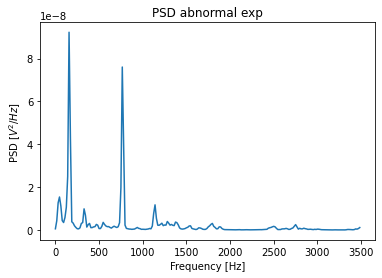

In [56]:
import importData
from importData import AudioDataImporter
from pathlib import Path
import processing_methods
filepath2 = Path("C:/Users/carbo/Documents/MIMII/RawData/+6dB/valve/id_02/abnormal")
dic = {'channel' : 1}
dic['max_freq'] = 3500

importer2 = AudioDataImporter(filepath2, dic, "normal")
dic, raw_data = importer2._set_raw_data()

PSD_calculator = processing_methods.PSD_class(dic)
PSD_calculator.compute(raw_data)
PSDval_2 = PSD_calculator.processed_data[2]
f_vec = PSD_calculator.f_vec
fun_plot(PSDval_2, f_vec, 'Frequency [Hz]' ,'PSD [$V^2/Hz$] ','PSD abnormal exp', save = True)

Compare normal and abnoraml on same plot

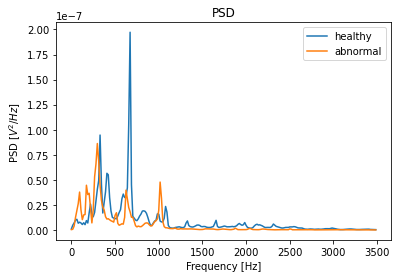

In [45]:
plt.plot(f_vec,PSDval_1)
plt.plot(f_vec,PSDval_2)
plt.title('PSD')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [$V^2/Hz$] ')
plt.legend(['healthy', 'abnormal'])
plt.savefig('comparing_feat.png')
plt.show()

Compute spectrogram for pump audio

In [73]:
import importData
from importData import AudioDataImporter
from pathlib import Path
import processing_methods
filepath2 = Path("C:/Users/carbo/Documents/MIMII/RawData/+6dB/pump/id_02/normal")
dic = {'channel' : 1}
dic['max_freq'] = 3500

importer2 = AudioDataImporter(filepath2, dic, "normal")
dic, raw_data = importer2._set_raw_data()

Spectro_calculator = processing_methods.Spectro_class(dic)
Spectro_calculator.compute(raw_data)
#f_vec = PSD_calculator.f_vec
#fun_plot(PSDval_2, f_vec, 'Frequency [Hz]' ,'PSD [$V^2/Hz$] ','PSD abnormal exp', save = True)

In [91]:
import numpy as np
Spectroval_2 = np.transpose(Spectro_calculator.processed_data[2])
Spectroval_2

array([[-30.09475362, -22.54322907, -19.3671874 , ..., -18.31098477,
        -19.32490547, -19.39072519],
       [-28.20724291, -18.20838401, -19.5450334 , ..., -20.40904423,
        -18.56874831, -20.69203794],
       [-24.76412681, -24.13100136, -24.12742037, ..., -22.07631357,
        -18.53718441, -26.01361633],
       ...,
       [-43.85986053, -45.16217822, -39.84503743, ..., -39.4748889 ,
        -44.74714498, -44.95583903],
       [-47.10993738, -44.76363675, -39.23422422, ..., -38.07592439,
        -44.48386332, -45.85160627],
       [-47.55776079, -46.68295332, -42.65923291, ..., -44.00723268,
        -46.29354076, -48.76853391]])

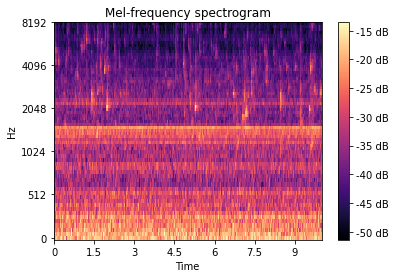

In [95]:
import librosa
from librosa import display
fig, ax = plt.subplots()
img = librosa.display.specshow(Spectroval_2, x_axis='time',

                         y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.savefig('pump-spectrogram' + '.png')
